# Image classification and Data Augmentation

`Data Augmentation is to take training images and then; rotate, flip, zoom, move image to right and left, for better training of model`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, \
  Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

2025-09-24 12:20:13.508146: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 12:20:13.509615: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 12:20:13.516260: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 12:20:13.535139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758698413.566996  336136 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758698413.57

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.astype('float') / 255.0, x_test.astype('float') / 255.0

In [4]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
x_train[0].shape

(32, 32, 3)

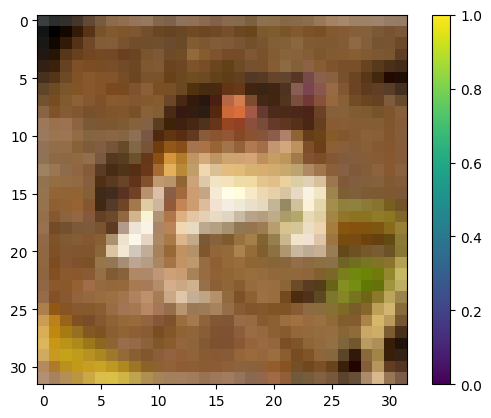

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape), # input layer
    
    # Data Augmentation layers
    tf.keras.layers.RandomFlip("horizontal_and_vertical"), # move image left/right, up/down
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    BatchNormalization(), # batch normalization layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    BatchNormalization(), # batch normalization layer
    tf.keras.layers.MaxPooling2D(), # pooling layer

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    # tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    # BatchNormalization(),
    # tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    # BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(), # flatten layer
    Dropout(0.2), # dropout layer
    tf.keras.layers.Dense(1024, activation='relu'), # hidden layer
    Dropout(0.2), # dropout layer
    tf.keras.layers.Dense(K, activation='softmax') # output layer
])

2025-09-24 12:20:24.161105: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,639,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,716,010 (6.55 MB)

 Trainable params: 1,715,626 (6.54 MB)

 Non-trainable params: 384 (1.50 KB)

`DON'T RUN THIS. IT WILL TAKE TOO MUCH TIME`

In [ ]:
# %%time

# # Fit with data augmentation
# r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1028, verbose=1)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.2655 - loss: 2.8321 - val_accuracy: 0.1424 - val_loss: 2.6878
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4289 - loss: 1.5751 - val_accuracy: 0.1279 - val_loss: 3.6859
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4789 - loss: 1.4485 - val_accuracy: 0.1006 - val_loss: 3.8416
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5121 - loss: 1.3491 - val_accuracy: 0.1145 - val_loss: 4.1218
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5408 - loss: 1.2889 - val_accuracy: 0.2198 - val_loss: 3.3169
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5612 - loss: 1.2260 - val_accuracy: 0.2382 - val_loss: 2.9604
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5831 - loss: 1.1710 - val_accuracy: 0.2828 - val_loss: 2.4082
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6008 - loss: 1.1282 - val_accuracy: 0.3350 - val_los

In [ ]:
# # save the model
# model.save('models_saved/cifar_data_augmentation.keras')

In [ ]:
# model = tf.keras.models.load_model('./models_saved/cifar_data_augmentation.keras')  # Loading the model

In [16]:
# data augmentation don't get applied during evaluation. It only gets applied during training.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7443 - loss: 0.7977


[0.802828848361969, 0.7423999905586243]

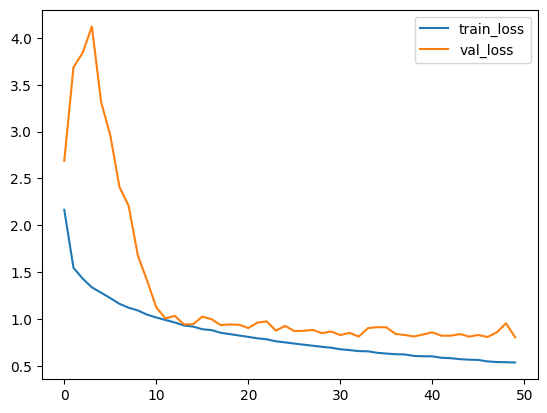

In [34]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

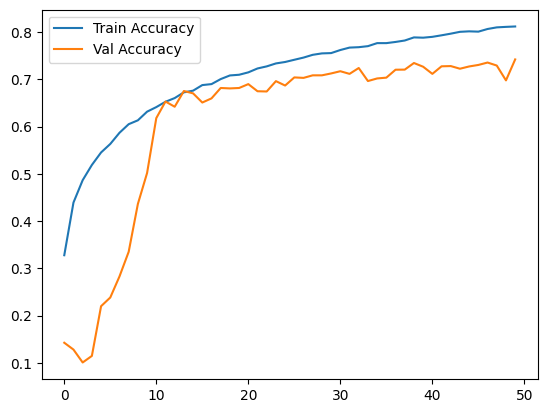

In [35]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()

In [36]:
predictions = model.predict(x_test)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


(10000, 10)

In [37]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([3, 8, 1, ..., 5, 1, 7])

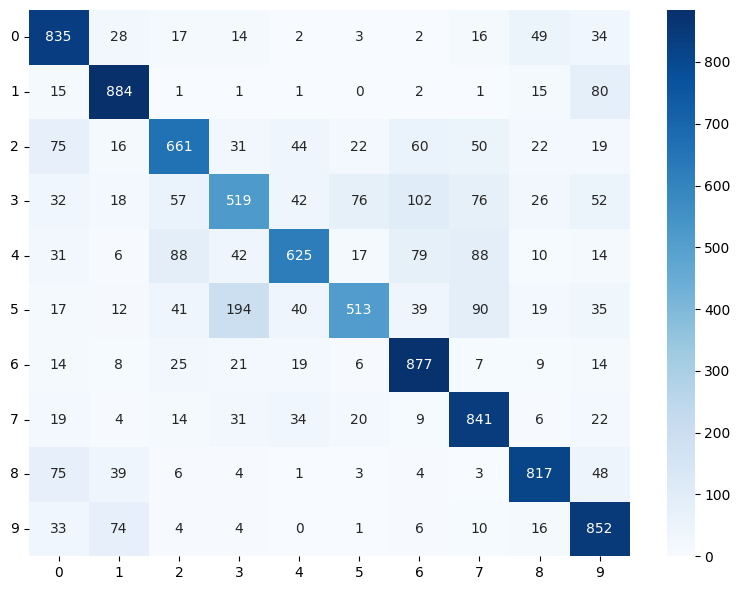

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_labels) # Create the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()